In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

In [3]:
df_can = pd.read_excel('data/Canada.xlsx',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)

In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [6]:
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace = True)

df_can['Total'] =  df_can.sum (axis = 1)
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [7]:
!pip install wordcloud

In [59]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [60]:
stopwords = set(STOPWORDS)

In [64]:
alice_novel = open('data/alice_novel.txt').read()
    
print (len(alice_novel))

145192


In [67]:
STOPWORDS.add('said')

alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=STOPWORDS
)

# generate the word cloud
alice_wc.generate(alice_novel)

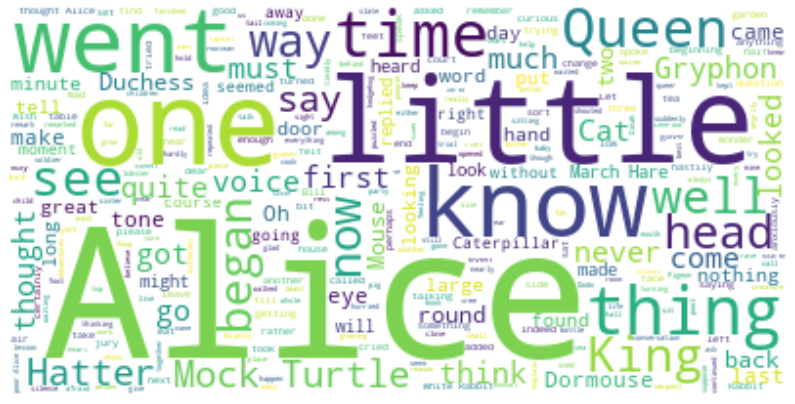

In [68]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

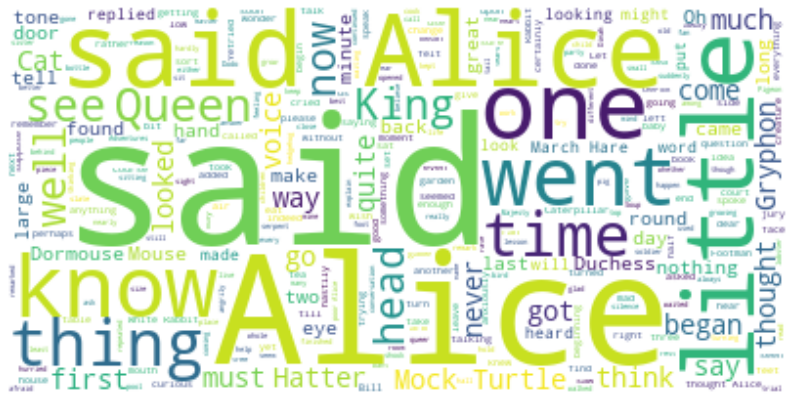

In [13]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

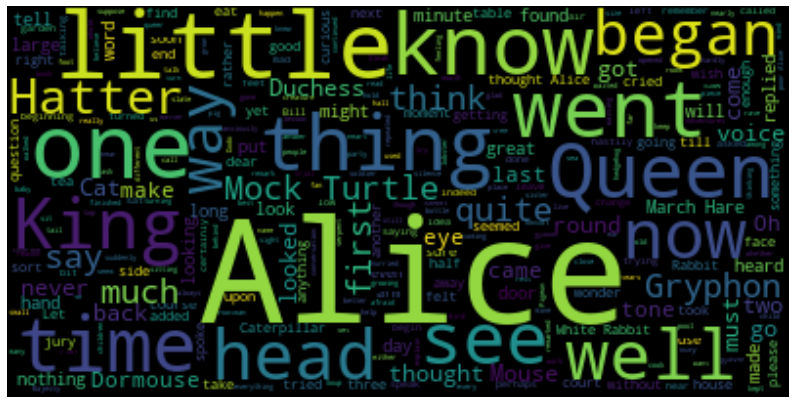

In [14]:
stopwords.add('said') # add the words said to stopwords
alice_wc = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
)
# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
alice_mask = np.array(Image.open('data/alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


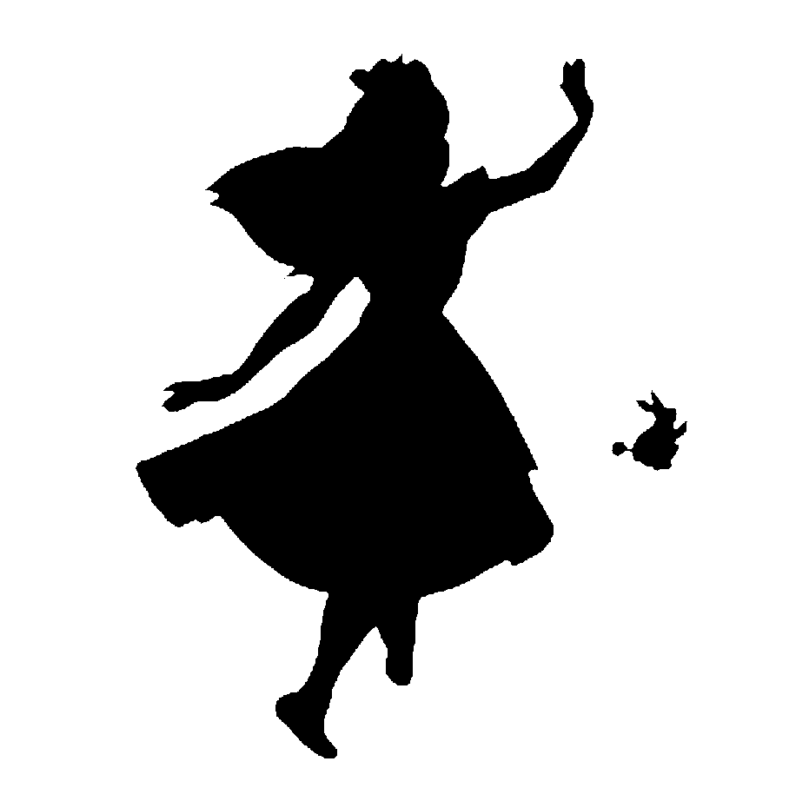

In [16]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

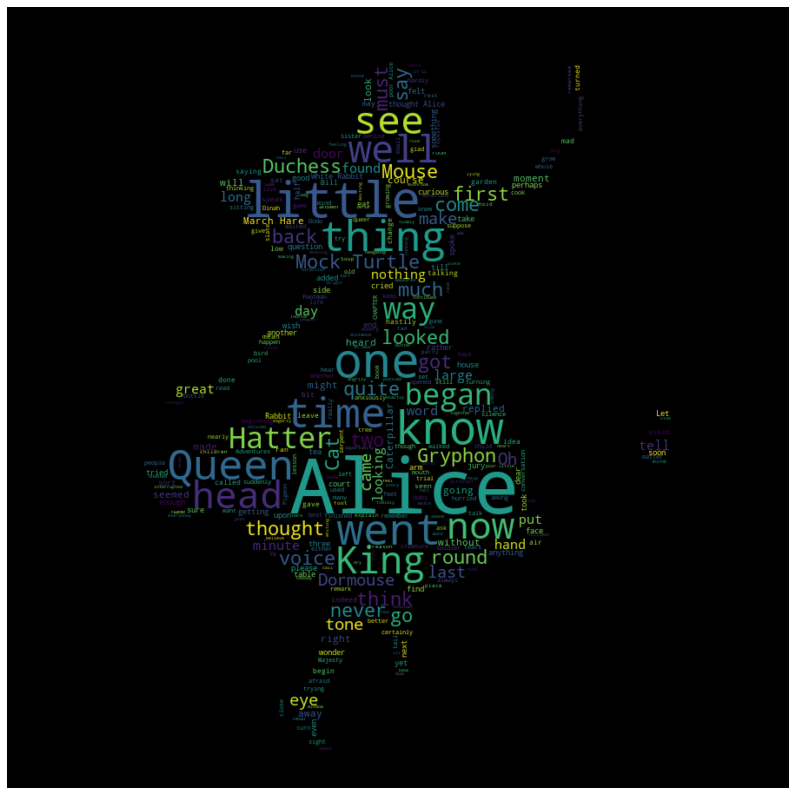

In [17]:
alice_wc = WordCloud(background_color='black', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [18]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [19]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [20]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string


'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [21]:
wordcloud = WordCloud(background_color='black').generate(word_string)

print('Word cloud created!')

Word cloud created!


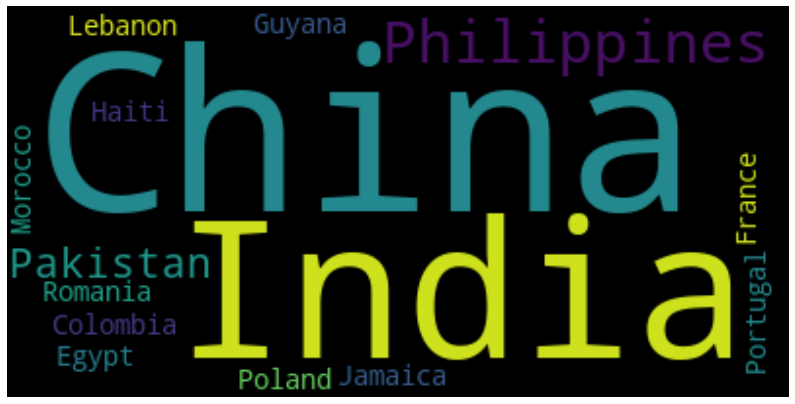

In [22]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [24]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


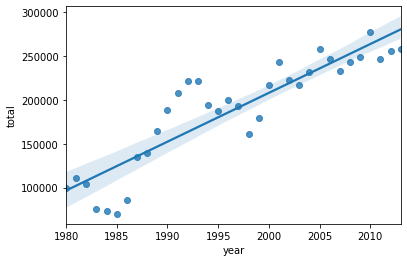

In [25]:
ax = sns.regplot(x='year', y='total', data=df_tot)

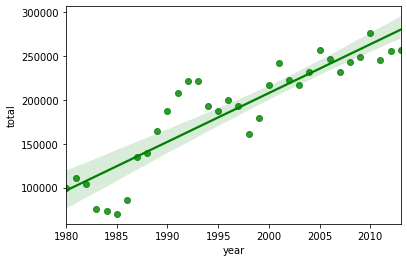

In [26]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

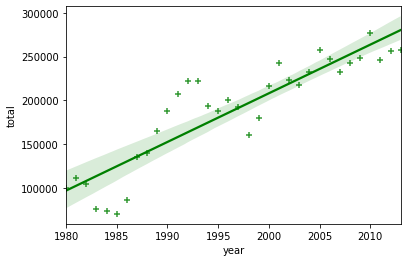

In [27]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

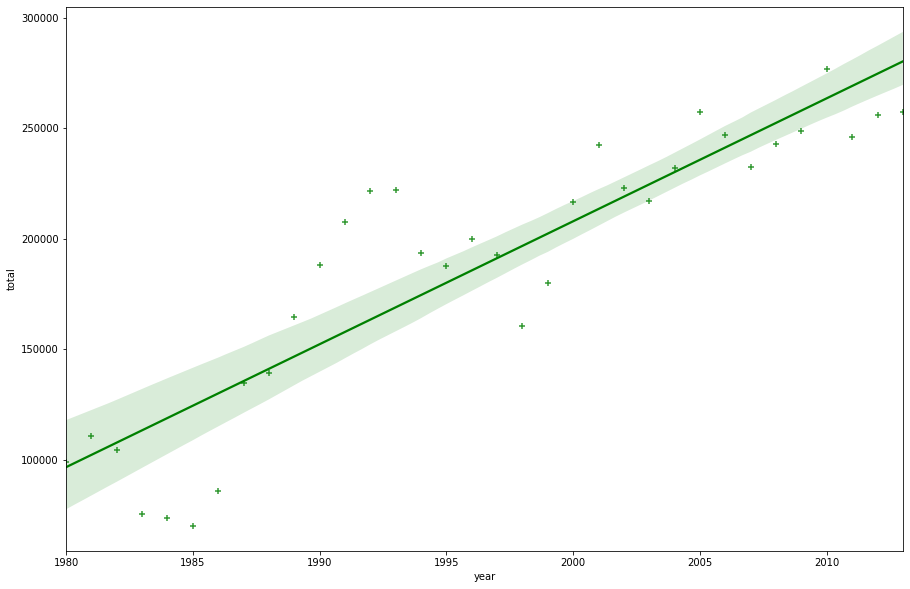

In [28]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

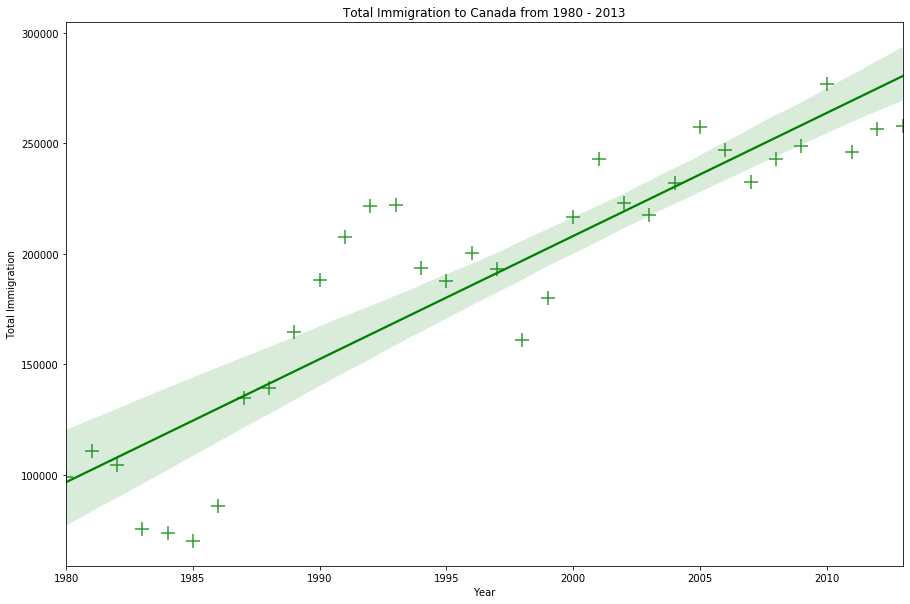

In [29]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

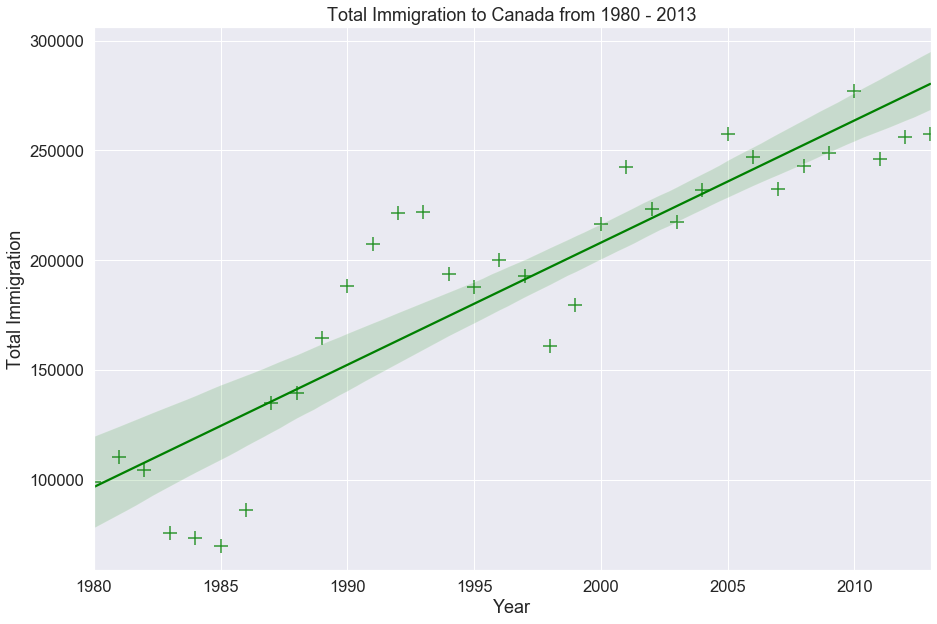

In [30]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

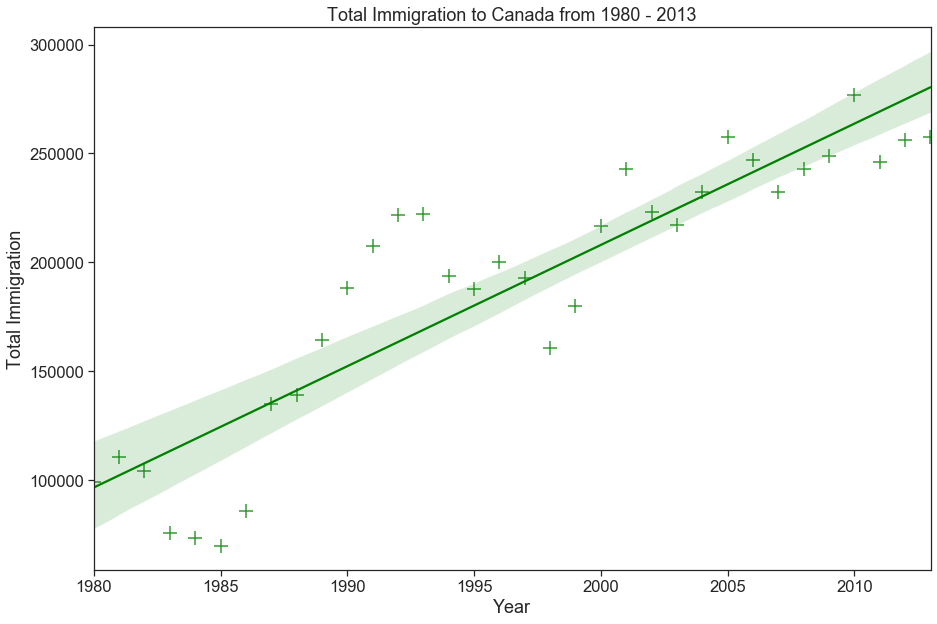

In [31]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

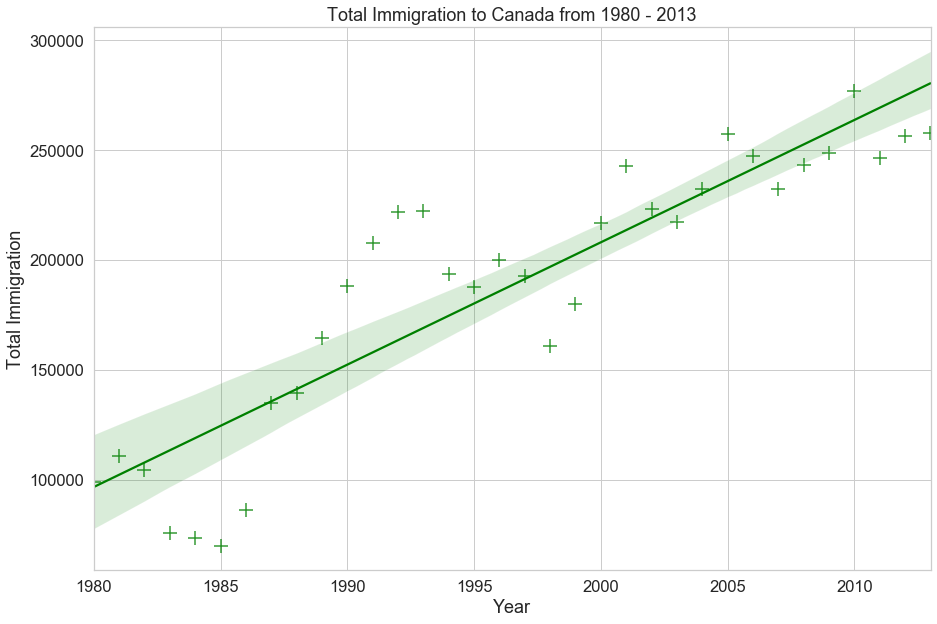

In [32]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')


Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

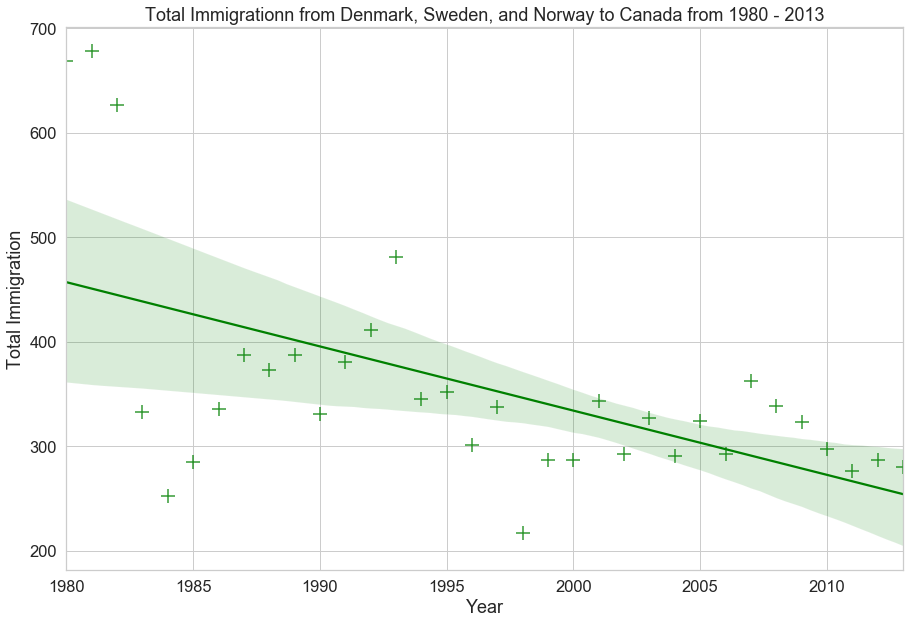

In [33]:
### type your answer here
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
# reset index in place
df_total.reset_index(inplace=True)
# rename columns
df_total.columns = ['year', 'total']
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
# define figure size
plt.figure(figsize=(15, 10))
# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

# Membuat Peta dengan Folium

In [34]:
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [35]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [52]:
# define the world map centered around Semarang with a low zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=12)

# display world map
world_map

In [53]:

# define the world map centered around Semarang with a higher zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=15, tiles="Stamen Watercolor")

# display world map
world_map

In [38]:
### type your answer here
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)
# display world map
world_map

In [54]:
# MEnambah marker ke map
map_h8 = folium.Map(location=[-6.260727, 106.781632], zoom_start=15, tiles="Stamen Toner")

map_h8.add_child(
        folium.CircleMarker(
            [-6.260727, 106.781632],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
)

In [39]:
df_incidents = pd.read_csv('data/Police_Department_Incidents_-_Previous_Year__2016_.csv')

df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [40]:
df_incidents.shape

(150500, 13)

In [41]:
# mengambil 100 data saja
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [42]:
df_incidents.shape

(100, 13)

In [43]:
# bikin map san francisco
latitude = 37.77
longitude = -122.42

In [44]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [45]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for y, x, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [y, x],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [46]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [47]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [48]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

In [49]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [56]:
# import data imigrasi Canada
df_can = pd.read_excel('data/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

# kita mau drop kolom yang tidak kita pakai
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# merubah nama kolom seperti OdName menjadi Country
df_can.rename(columns={
    "OdName": "Country",
    "RegName": "Region",
    "AreaName": "Continent"
}, inplace=True)

# kita bisa tambahkan kolom Total
df_can['Total'] = df_can.sum(axis=1)

years=range(1980,2014)

print(df_can.shape)
df_can.head()

(195, 39)


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [57]:
world_geo = r'./data/world_countries.json'

world_map = folium.Map(
        location=[0,0], 
        zoom_start=2, 
        tiles='"http://{s}.tiles.mapbox.com/v4/wtgeographer.2fb7fc73/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RlZmt3YW4iLCJhIjoiY2twMjV2ajdkMTZrbzJucHI3YTgxbjM2diJ9.oHD6Rw0KJYhnaYzK2pL__Q',
        attr='XXX Mapbox Attribution'
    )

folium.Choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'], # perhatikan kolom Country nya tidak boleh ada di index
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

world_map